<a href="https://colab.research.google.com/github/psbruno/Colab/blob/master/Projeto_4_Propaga%C3%A7%C3%A3o_de_Informa%C3%A7%C3%A3o_em_Redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Propagação de informação em Redes, no modelo de rede aleatória e de rede livre de escala
  ### Ana Clara Mueller Miranda, RA:148806
  ### Bruno Pires Moreira Silva, RA:139892
  ### Jonatas Carrocine, RA:143472

##1. Introdução


Neste projeto, será desenvolvido dois modelos de propagação em redes, onde será analisado a disseminação de fake news em diferentes cenários e poderemos observar como será a propogação de fake news, como quantas pessoas recebem a fake news e depois passam adiante, ou quantas pessoas não passam a fake news adiante.

##2. Condições para a propagação


Grau de propagação:
- 1: Não checa nada de notícias, alta probabilidade de fake news, se a notícia o convém ele passa, 80% de passar fake news
- 2: Faz uma breve checagem sobre a notícia, uma busca superficial não precisa ser de uma fonte muito confiável, 50% de passar de fake news
- 3: Faz uma checagem extensa e aprofundado, buscando fontes confiáveis e com embasamento, baixa probabilidade de passar fake news, 20% de passar fake news

Grau de "cura":
- 1: Não se cura, toda pessoa que entrar em contato com ele, ele irá transmitir a fake news. Abstraindo, a pessoa não teria acesso à informações verídicas e iria crer veementemente que a notícia é legítima.
- 2: A pessoa tem acesso à informações verídicas. A cada dia que se passa, a chance dela consumir uma informação que prove que a informação é falsa aumenta, e quando isso acontecer, ela avisará os seus vizinhos.

Checa o grau de propagação para ver quantas pessoas vai "infectar" com as fake news, depois checa o grau de cura dessa pessoa e a quanto tempo ela ja recebeu uma fake news (se for grau 2 ou 3 ela se cura e cura as pessoas ao seu redor) e assim por diante.

Para realizar a simulação, foi aplicado um grau médio 4 para ambos os modelos, sendo assim, uma pessoa vai transmitir as "fake news" para outras 4 pessoas.

##3. Desenvolvimento

###3.1 Propagação no modelo de rede aleatória

####3.1.1 Modelo padrão

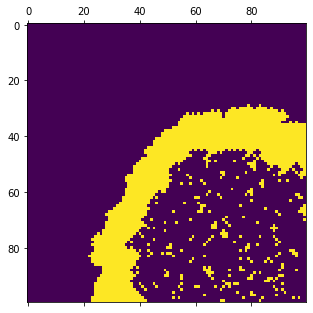

In [ ]:
plt.figure(figsize=(10,5)) #Gera o tamanho da imagem
plt.matshow(rede,fignum=1)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def shutup(i,j):
  if (cura[i][j]<0): #A pessoa nao vai se 'curar' das 'fake news'
    return

  if (cura[i][j]>50): #A pessoa se 'cura', e seus vizinhos tambem se 'curam'
    rede[i][j]=0
    if (i>0 ):
      rede[i-1][j]=0
    if (i<99):
      rede[i+1][j]=0
    if (j>0):
      rede[i][j-1]=0
    if (j<99):    
      rede[i][j+1]=0
  else:
    if (rede[i][j]==1):
      cura[i][j]+=np.random.randint(1,5) #Para cada passagem de tempo, aumenta de 0 a 4 o intervalo pra ela se 'curar' da notícia falsa
  


def ContaminaVizinhos(i,j): #Funcao que determinada pessoa recebe a informacao, atribuindo '1'
  rede[i][j]=1
def checaPercent(i,j):
  if (percents[i][j]==1): #A pessoa vai ter 20% de chance de transmitir a informacao
    return 80
  if (percents[i][j]==2): #A pessoa vai ter 50% de chance de transmitir a informacao
    return 50
  if (percents[i][j]==3): #A pessoa vai ter 80% de chance de transmitir a informacao
    return 20
def simula(r1,r2):
  rede[r1][r2]=1
  print('COMECO DA PROPAGACAO: ',r1,r2) #Define a pessoa inicial que vai propagar as notícias falsas
  duracao = 50

  for k in range (0,duracao): #A transmissao vai ocorrer durante o tempo 'duracao' definido

    for i in range(0,100): 
      for j in range(0,100): #Eixos horizontais e verticais
        if (np.random.randint(100)>checaPercent(i,j) and rede[i][j]==1): #Se a pessoa for infectada, ela vai passar para 4 pessoas
          if (i>0 ):
            ContaminaVizinhos(i-1,j)
          if (i<99):
            ContaminaVizinhos(i+1,j)
          if (j>0):
            ContaminaVizinhos(i,j-1)
          if (j<99):
            ContaminaVizinhos(i,j+1)

    for i in range(0,100):
      for j in range(0,100):
        shutup(i,j)



rede = np.zeros((100,100),dtype=int)
#Geração das 100 porcentagens
percents = np.zeros((100,100),dtype=int)
for i in range(0,100):
  for j in range(0,100):
    percents[i][j]=np.random.randint(3)+1  

#Geração dos 100 graus de cura (cada pessoa vai ter alguma condicao, caso ela recebe as "fake news")
cura = np.zeros((100,100),dtype=int)
for i in range(0,100):
  for j in range(0,100):
    cura[i][j]=np.random.randint(-1,1)
NoInicial1 = np.random.randint(100)
NoInicial2 = np.random.randint(100)
simula(NoInicial1,NoInicial2)


COMECO DA PROPAGACAO:  71 62


####3.1.2 Modelo com probabilidade de transimssão igual a 0


Se a pessoa receber a informação (fake news), neste cenário, ela vai ter 0% de chance de transmitir ela para as suas conexões (ou seja as pessoas com as quais ela teve contato), sendo assim, a pessoa vai se 'curar' da informação (irá checar e ver que é uma notícia falsa e não passará a notícia para as pessoas), e assim, não apresenta uma transmissão de rede.


#####3.1.2.1 Código

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def shutup(i,j):
  if (cura[i][j]<0): #A pessoa nao vai se 'curar' das 'fake news'
    return

  if (cura[i][j]>50): #A pessoa se 'cura', e seus vizinhos tambem se 'curam'
    rede[i][j]=0
    if (i>0 ):
      rede[i-1][j]=0
    if (i<99):
      rede[i+1][j]=0
    if (j>0):
      rede[i][j-1]=0
    if (j<99):    
      rede[i][j+1]=0
  else:
    if (rede[i][j]==1):
      cura[i][j]+=np.random.randint(1,5) #Para cada passagem de tempo, aumenta de 0 a 4 o intervalo pra ela se 'curar' da notícia falsa

def ContaminaVizinhos(i,j): #Funcao que determinada pessoa recebe a informacao, atribuindo '1'
  rede[i][j]=1
def checaPercent(i,j):
  if (percents[i][j]==1): #A pessoa vai ter 0% de chance de transmitir a informacao
    return 100
def simula(r1,r2):
  rede[r1][r2]=1
  print('COMECO DA PROPAGACAO: ',r1,r2) #Define a pessoa inicial que vai propagar as notícias falsas
  duracao = 50

  for k in range (0,duracao): #A transmissao vai ocorrer durante o tempo 'duracao' definido
    for i in range(0,100): 
      for j in range(0,100): #Eixos horizontais e verticais
        if (np.random.randint(100)>checaPercent(i,j) and rede[i][j]==1): #Se a pessoa for infectada, ela vai passar para 4 pessoas
          if (i>0 ):
            ContaminaVizinhos(i-1,j)
          if (i<99):
            ContaminaVizinhos(i+1,j)
          if (j>0):
            ContaminaVizinhos(i,j-1)
          if (j<99):
            ContaminaVizinhos(i,j+1)

    for i in range(0,100):
      for j in range(0,100):
        shutup(i,j)

rede = np.zeros((100,100),dtype=int)
#Geração das 100 porcentagens
percents = np.zeros((100,100),dtype=int)
for i in range(0,100):
  for j in range(0,100):
    percents[i][j]=np.random.randint(1)+1  

#Geração dos 100 graus de cura (cada pessoa vai ter alguma condicao, caso ela recebe as "fake news")
cura = np.zeros((100,100),dtype=int)
for i in range(0,100):
  for j in range(0,100):
    cura[i][j]=np.random.randint(-1,1)
NoInicial1 = np.random.randint(100)
NoInicial2 = np.random.randint(100)
simula(NoInicial1,NoInicial2)

COMECO DA PROPAGACAO:  36 21


#####3.1.2.2 Gráfico resultante

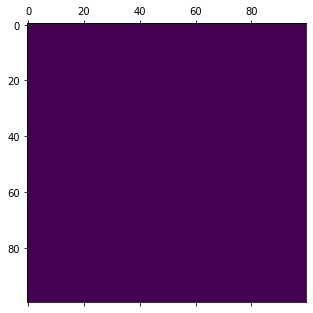

In [ ]:
plt.figure(figsize=(10,5)) #Gera o tamanho da imagem
plt.matshow(rede,fignum=1)

plt.show()

A pessoa que inicia a transmissão está localizada na posição x=36 e y=21.

Como a transmissão é de 0%, significa que não terá propagação, todas as pessoas e suas conexões irão se 'curar', logo não existe ninguém propagando a fake news adiante.

####3.1.3 Modelo com probabilidade de transimssão igual a 1

Se a pessoa receber a informação, neste cenário, ela vai ter 100% de chance de transmitir ela para as suas conexões, sendo assim, em pouco tempo, toda a rede vai estar contaminada.

#####3.1.3.1 Código

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def shutup(i,j):
  if (cura[i][j]<0): #A pessoa nao vai se 'curar' das 'fake news'
    return

  if (cura[i][j]>50): #A pessoa se 'cura', e seus vizinhos tambem se 'curam'
    rede[i][j]=0
    if (i>0 ):
      rede[i-1][j]=0
    if (i<99):
      rede[i+1][j]=0
    if (j>0):
      rede[i][j-1]=0
    if (j<99):    
      rede[i][j+1]=0
  else:
    if (rede[i][j]==1):
      cura[i][j]+=np.random.randint(1,5) #Para cada passagem de tempo, aumenta de 0 a 4 o intervalo pra ela se 'curar' da notícia falsa

def ContaminaVizinhos(i,j): #Funcao que determinada pessoa recebe a informacao, atribuindo '1'
  rede[i][j]=1
def checaPercent(i,j):
  if (percents[i][j]==1): #A pessoa vai ter 100% de chance de transmitir a informacao
    return 0
def simula(r1,r2):
  rede[r1][r2]=1
  print('COMECO DA PROPAGACAO: ',r1,r2) #Define a pessoa inicial que vai propagar as notícias falsas
  duracao = 50

  for k in range (0,duracao): #A transmissao vai ocorrer durante o tempo 'duracao' definido
    for i in range(0,100): 
      for j in range(0,100): #Eixos horizontais e verticais
        if (np.random.randint(100)>checaPercent(i,j) and rede[i][j]==1): #Se a pessoa for infectada, ela vai passar para 4 pessoas
          if (i>0 ):
            ContaminaVizinhos(i-1,j)
          if (i<99):
            ContaminaVizinhos(i+1,j)
          if (j>0):
            ContaminaVizinhos(i,j-1)
          if (j<99):
            ContaminaVizinhos(i,j+1)

    for i in range(0,100):
      for j in range(0,100):
        shutup(i,j)

rede = np.zeros((100,100),dtype=int)
#Geração das 100 porcentagens
percents = np.zeros((100,100),dtype=int)
for i in range(0,100):
  for j in range(0,100):
    percents[i][j]=np.random.randint(1)+1  

#Geração dos 100 graus de cura (cada pessoa vai ter alguma condicao, caso ela recebe as "fake news")
cura = np.zeros((100,100),dtype=int)
for i in range(0,100):
  for j in range(0,100):
    cura[i][j]=np.random.randint(-1,1)
NoInicial1 = np.random.randint(100)
NoInicial2 = np.random.randint(100)
simula(NoInicial1,NoInicial2)

COMECO DA PROPAGACAO:  50 30


#####3.1.3.2 Gráfico resultante

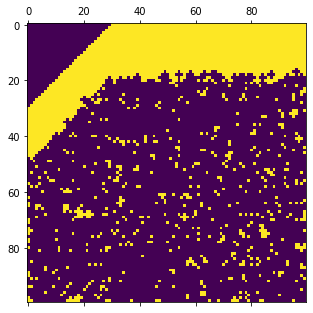

In [ ]:
plt.figure(figsize=(10,5)) #Gera o tamanho da imagem
plt.matshow(rede,fignum=1)

plt.show()

Como observado, todas as pessoas serão infectadas em algum momento, mas mesmo assim, algumas irão deixar de propagar notícias falsas no decorrer do tempo.

Considerando isso, se não houvesse um tempo de "cura", todas as pessoas iriam se infectar pela notícia falsa.

###3.2 Propagação no modelo Barabási–Albert



Para a propagação neste modelo, temos que os vértices com mais conexões, possuem uma probabilidade maior de se conectarem com novos vértices. Para realizar a simulação, foi utilizado uma bilioteca do NetworkX.

Para representar, quando um nó estiver vermelho, significa que a pessoa está "infectada" pelas "fakes news", se um nó estiver amarelo, a pessoa não está com as "fake news".

####3.2.1 Modelo padrão

Geração Inicial:


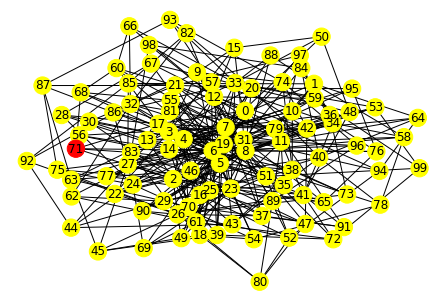

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.barabasi_albert_graph(100,4,15)
#Cria o modelo de grafo Barabasi-Albert, onde o primeiro parametro eh o numero de nos, o segundo parametro eh
# o grau medio de conexoes, e o terceiro parametro eh um valor fixo para a configuracao das conexoes
layout = nx.spring_layout(G)

color_map = []
for node in G:
    if node == NoInicial1:
        color_map.append('red')
    else: 
        color_map.append('yellow')
print('Geração Inicial:')
nx.draw(G,node_color=color_map,with_labels=True)
plt.show()

Como observado no gráfico acima, o nó 71 é a pessoa que vai começar a propagar as "fake news", portanto, no decorrer do tempo, ela vai transmitir para as suas próximas conexões.

In [ ]:
def Geracao(no,ger):
  color_map[no]='red'
  for edge in G.edges():
    if edge[0]==no:
      color_map[edge[1]]='red'

  if ( ger%10==0 ):
    print("Número da geracao: ", ger)
    nx.draw(G,node_color=color_map,with_labels=True) #Mostra o grafico a cada 10 geracoes
    plt.show()

Número da geracao:  10


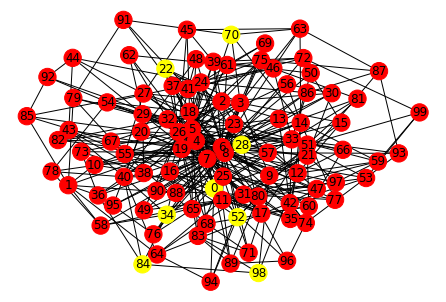

Número da geracao:  20


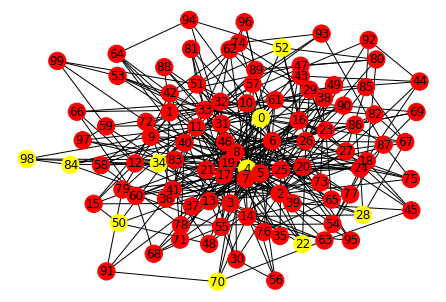

Número da geracao:  30


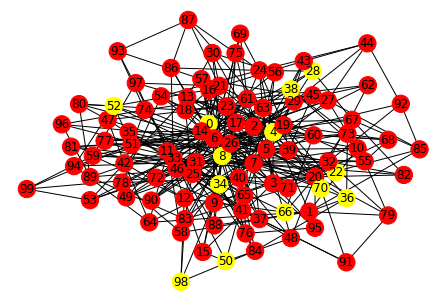

Número da geracao:  40


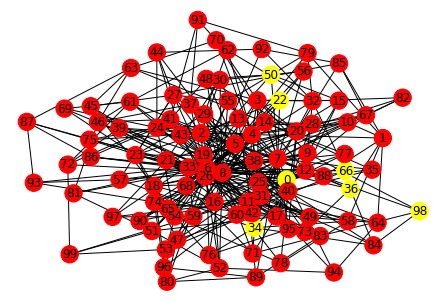

In [ ]:
for i in range(40):
  for j in range(0,100,2):
    if (color_map[j] == 'red' and np.random.randint(100)<1):
      color_map[j] = 'yellow'
  Geracao(np.random.randint(100),i+1)

Como pode ser observado, a grande maioria das pessoas foram contaminadas, apesar disso, algumas pessoas acabam se curando das "fake news", parando de transmitir.

####3.2.2 Modelo com probabilidade de transmissão igual a 1

#####3.2.2.1 Código

Geração Inicial:


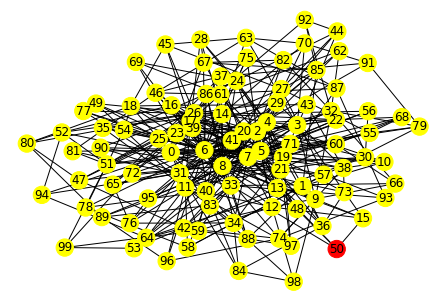

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.barabasi_albert_graph(100,4,15)
#Cria o modelo de grafo Barabasi-Albert, onde o primeiro parametro eh o numero de nos, o segundo parametro eh
# o grau medio de conexoes, e o terceiro parametro eh um valor fixo para a configuracao das conexoes
layout = nx.spring_layout(G)

color_map = []
for node in G:
    if node == NoInicial1:
        color_map.append('red')
    else: 
        color_map.append('yellow')
print('Geração Inicial:')
nx.draw(G,node_color=color_map,with_labels=True)
plt.show()

In [ ]:
def Geracao(no,ger):
  color_map[no]='red'
  for edge in G.edges():
    if edge[0]==no:
      color_map[edge[1]]='red'

  if ( ger%15==0 ):
    print("Número da geracao: ", ger)
    nx.draw(G,node_color=color_map,with_labels=True) #Mostra o grafico a cada 10 geracoes
    plt.show()

#####3.2.2.2 Gráfico

Número da geracao:  15


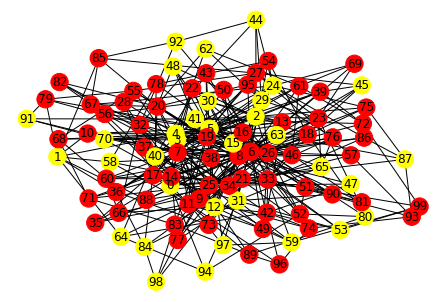

Número da geracao:  30


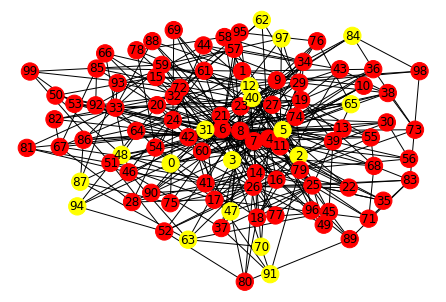

Número da geracao:  45


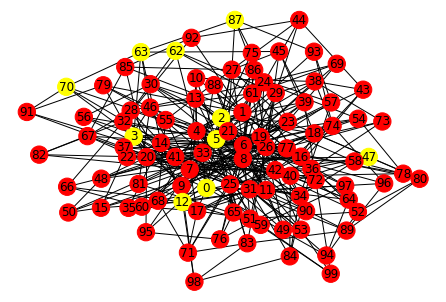

Número da geracao:  60


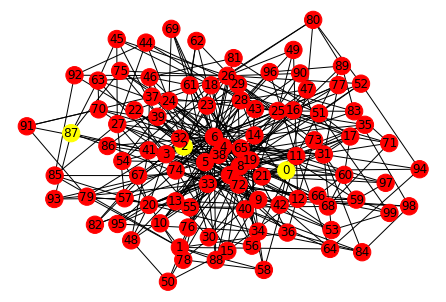

Número da geracao:  75


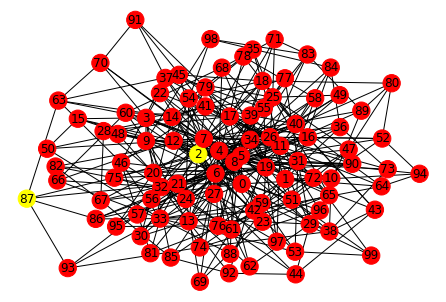

In [ ]:
for i in range(75):
  for j in range(0,100,2):
    if (color_map[j] == 'red' and np.random.randint(100)<0):
      color_map[j] = 'yellow'
  Geracao(np.random.randint(100),i+1)

Como pode ser observado no decorrer do tempo, as pessoas que se infectam, elas não para de transmitir notícias falsas, logo os únicos nós que ainda não receberam foram os nós 2 e 87, até a geração 75.